# TP4 
 - HUARD Titouan
 - LYSEE Nicolas

on importe les librairies utiles pour la suite.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from math import sqrt

from scipy.stats.stats import ttest_1samp , ttest_ind

# Exercice 1

L'objectif de cette exercice est de savoir si
l'echantillon de mesure relevé par l'entreprise
est bien accord avec le processus normal de
fabrication. Pour rapelle, il faut que les pieces
soient de 20 cm de diametre avec une variation
de 1mm (population).

On commence par ouvrir le tableau representant l'echantillon.
On effectuera à ce moment la un traitement pour enlever les valeurs "nan".

In [2]:
ech = pd.read_excel("Exercice1.xlsx",header=0, engine="openpyxl", verbose=True, na_values=["na"])
ech.dropna(inplace=True)

Reading sheet 0


## Description de l'echantillon

In [3]:
print("taille de l'echantillon est : ", len(ech.values))
print("la moyenne xbarre de l'echantillon est : ", np.mean(ech.values))
print("la variance s^2 de l'echantillon est : ", np.var(ech.values))
print("L'ecart type dans cet echantillon est de : ",np.std(ech.values))

taille de l'echantillon est :  479
la moyenne xbarre de l'echantillon est :  199.46586430062632
la variance s^2 de l'echantillon est :  0.964383983673362
L'ecart type dans cet echantillon est de :  0.9820305411102864


Nous avont aussi une visualisation de la repartition des mesures avec le boxplot suivant.

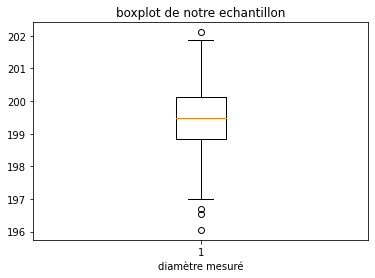

In [4]:
plt.figure()
plt.boxplot(ech.values)
plt.xlabel("diamètre mesuré")
plt.title("boxplot de notre echantillon")
plt.show()

No handles with labels found to put in legend.


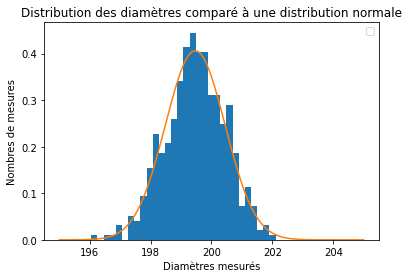

In [5]:
x=np.linspace(195,205,479)
plt.figure()
plt.hist(ech,bins=30,density=1)
plt.plot(x,norm.pdf(x,np.mean(ech.values),np.std(ech.values)))
plt.title("Distribution des diamètres comparé à une distribution normale")
plt.xlabel("Diamètres mesurés")
plt.ylabel("Nombres de mesures")
plt.legend()
plt.show()

Nous observons que la distribution semble suivre une loi normale.

Au vue de cette distrubution, on peut alors calculer un intervalle de confiance à 95%

## intervalle de confiance moyenne

In [6]:
def Intervalle_confiance_moyenne(ech,seuil,ecart_type):
    ##seuil en %
        #taille n de l'echantillon
    n=len(ech)
        #calcul de la moyenne
    xbarre=np.mean(ech)
        #calcul de zalpha2
    val=seuil/100+(1-seuil/100)/2
    zalpha2=norm.ppf(val)
        #calcul des bornes de l'intervales
    marge=2*zalpha2*ecart_type*ecart_type/(sqrt(n))

    return (xbarre-marge/2,xbarre+marge/2)

print("intervalle de confiance moyenne population",Intervalle_confiance_moyenne(ech.values, 95,1))

intervalle de confiance moyenne population (199.37631126038724, 199.5554173408654)


Avec un risque de 5%, on peut affirmer que le diametre des pièces sera dans l'intervalle de confiance ci dessus.

## Test d'hypothese

On va faire les tests d'hypothese pour comparer une moyenne à la norme et ainsi savoir si l'echantillon respecte les standands.

On vas donc poser 2 hypothèses :

- (H0) soit mu=200
- (H1) soit mu != 200 (hyphotese bilaterale)

On va aussi fixer le risque alpha = P(H0rejetée/H0vraie) = 5%
Soit H0 vraie, zthéorique=1,96 (en centrant et reduisant la loi suivant par Xbarre)

H0 rejeté si Xbarre* < -1,96 ou > 1,96
Ensuite on va comparer cette valeur théorique à la valeur de zobservé dans notre echantillon de mesures.

In [7]:
from scipy.stats import ttest_ind

print(ttest_1samp(ech.values, 200))

Ttest_1sampResult(statistic=array([-11.8916073]), pvalue=array([9.55347214e-29]))


On voit que zobs = -11,89 ce qui fait que H0 est rejeter donc on peut affirmer avec un risque d'erreur
à 5% que l'echantillon ne rentre pas dans les standards de fabrication de l'entreprise.

# Exercice 2

L'entreprise affirme que moins de 1% des badges fabriqués ne fonctionnent pas. L'objectif de l'exercice est de savoir si cette affirmation est bien respectée.

## Description de l'echantillon

In [8]:
ech = pd.read_excel("Exercice2.xlsx",header=0, engine="openpyxl", index_col=0, verbose=True)

print("taille de l'echantillon", len(ech.values))
print("la moyenne xbarre de l'echantillon est : ", np.mean(ech.values))
print("la variance s^2 de l'echantillon est : ", np.var(ech.values))
print("L'ecart type dans cet echantillon est de : ",np.std(ech.values))

Reading sheet 0
taille de l'echantillon 100
la moyenne xbarre de l'echantillon est :  0.11
la variance s^2 de l'echantillon est :  0.09790000000000001
L'ecart type dans cet echantillon est de :  0.31288975694324034


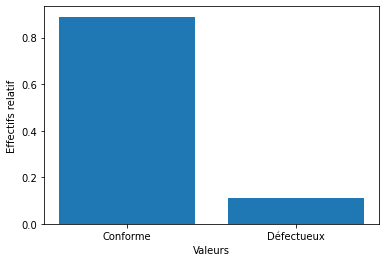

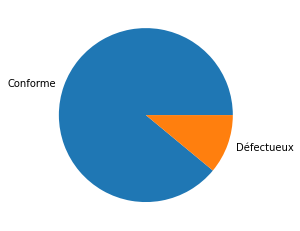

In [9]:
(Valeurs,FreqAbsolues)=np.unique(ech, return_counts=True)
FreqRelatives=FreqAbsolues/len(ech)
plt.figure()
plt.bar(['Conforme', 'Défectueux'], FreqRelatives, )
plt.xlabel('Valeurs')
plt.ylabel('Effectifs relatif')
plt.show()

plt.figure()
plt.pie(FreqRelatives, labels=['Conforme', 'Défectueux'])
plt.show()

## test d'hypothese

Ici, on va comparer la proportion mesurée sur l'echantillon par rapport à une norme.

On vas donc poser 2 hypothèses :

- (H0) soit p = 0,01
- (H1) soit p > 0,01 (hypothese unilaterale droite)


On fixe le risque alpha = 5%, on suppose H0 vraie et ici, np > 5 et n(1-p) > 5.

On peut donc faire le test d'hypothese grâce à une loi normale.

zalpha = 1,645

In [10]:
print(ttest_1samp(ech.values, 0.01))

Ttest_1sampResult(statistic=array([3.17999364]), pvalue=array([0.00196659]))


Zobs > Zalpha donc H0 est rejetée. H1 est acceptée avec le risque d'erreur à 5%.
les badge de l'entreprise ne repondent donc pas à la norme des 1% de defaillances.

## Erreur dans l'enoncé ?

Les defaillances sont à 10% en moyenne.
Dans ce cas :

In [11]:
print(ttest_1samp(ech.values, 0.10))

Ttest_1sampResult(statistic=array([0.31799936]), pvalue=array([0.75115522]))


Ici, pvalue >> alpha donc on ne peut pas conclure l'hypothese H0 est non rejetée.

# Exercice 3

Recuperation des echantillons

In [12]:
ech = pd.read_excel("Exercice3.xlsx",header=0, engine="openpyxl", verbose=True)

vect1 = []
vect2 = []
for v in ech.values :
    if v[0] == 1:
        vect1.append(v[1])
    else:
        vect2.append(v[1])

Reading sheet 0


taille de l'echantillon 1 est 45
la moyenne xbarre de l'echantillon 1 est :  64.18087999999999
la variance s^2 de l'echantillon 1 est :  5.799055438933332
taille de l'echantillon 2 est 55
la moyenne xbarre de l'echantillon 2 est :  61.76546363636362
la variance s^2 de l'echantillon 2 est :  7.277290229586775


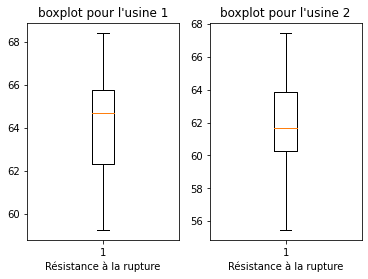

In [13]:
print("taille de l'echantillon 1 est", len(vect1))
print("la moyenne xbarre de l'echantillon 1 est : ", np.mean(vect1))
print("la variance s^2 de l'echantillon 1 est : ", np.var(vect1))

print("taille de l'echantillon 2 est", len(vect2))
print("la moyenne xbarre de l'echantillon 2 est : ", np.mean(vect2))
print("la variance s^2 de l'echantillon 2 est : ", np.var(vect2))

plt.figure()
plt.subplot(1,2,1)
plt.boxplot(vect1)
plt.xlabel("Résistance à la rupture")
plt.title("boxplot pour l'usine 1")

plt.subplot(1,2,2)
plt.boxplot(vect2)
plt.xlabel("Résistance à la rupture")
plt.title("boxplot pour l'usine 2")
plt.show()

## test d'hypothese

Ici, on va comparer les deux echantillons pour savoir
si il y a une difference notable de resistance entre
les deux ateliers.

On vas donc poser 2 hypothèses :

- (H0) soit mu1 = mu2
- (H1) soit mu2 > mu1


On fixe le risque alpha = 5%, on suppose H0 vraie.


In [14]:
print(ttest_ind(vect1, vect2))

Ttest_indResult(statistic=4.626189767826656, pvalue=1.140352684640741e-05)


Zobs = 4,626 et Zalpha = 1,645

donc Zobs > Zalpha donc hypothese H0 rejetée donc H1 validée. Avec une marge erreur a 5%, on peut dire que les fibres des deux ateliers ont des resistances differentes.